<h3>Line-sweep triangulation of a point cloud</h3>

Suppose we are given a set of points
$$P = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$$
in the plane $\mathbb{R}^2$ (represented in their cartesian coordinates).


Our task is to construct a triangulation of the  convex hull of $P$, i.e. of the polygon $\mathrm{conv}(P)$, via vertical line sweep.

The geometric intuition behind the algorithm is simple:

- Start with an empty set $K$ (this will eventually become our $2$-dimensional simplicial complex determining the triangulation).
- Imagine a vertical line in the plane sweeping from left to right.
- When the line hits a point $T \in P$:
  - add that point to $K$,
  - for every vertex to the left of $T$ add an edge from $T$ ending in that vertex if and only if that vertex is visible from $T$, and
  -  for every triangle formed by the vertex $T$ and an edge already in $K$ add the triangle to $K$ if and only if that edge is visible from $T$. 

We must now make precise the meaning of visible. Suppose that $K$ has been partially constructed and the vertical line has hit the next point $T \in P$ (which is not yet a vertex of $K$). Call a vertex $V$ of $K$ visible from $T$ if the segment $TV$ does not intersect any edge of $K$ (apart from the two edges containing $V$). Similarly, call an edge $E=V_1V_2 \in K$ visible from $T$ if the triangle $TV_1V_2$ does not intersect any other edge from $K$. Note that the edge $E = V_1V_2$ is visible from $T$ if and only if the midpoint of that edge is visible from $T$, so we only need to explain how to check for visibility of single points (vertices or edge midpoints) from $T$.

<h2>Intersection of two planar segments</h2>

Given two segments $AB$ and $CD$ in the plane $\mathbb{R}^2$ we would like to determine if these segments intersect. Each segment $PQ$ is represented by its boundary points $P(x_P, y_P)$ and $Q(x_Q, y_Q)$ or, equivalently, by the corresponding spatial (column) vectors 
$\mathbf{r}_P$ and $\mathbf{r}_Q$.

1) Parametrize the line through $A$ and $B$ and the line through $C$ and $D$. Write down the system of linear equations, which can be used to determine the point of intersection of the two lines. Find the additional conditions, which will assure that the segments $AB$ and $CD$ actually intersect.
2) Write a Julia function do\_segments\_intersect which returns true if the segments intersect and returns false if they don't intersect.

In [ ]:
using Plots
using LinearAlgebra


# Function to check if line segments AB and CD intersect
function intersect_q(xA, yA, xB, yB, xC, yC, xD, yD)
    # magic happens here
    return true||false
end


# Computes the orientation of the triangle ABC given coordinates of the vertices
function orientation(xA, yA, xB, yB, xC, yC)
    # magic happens here
    return true ? 1 : -1
end


# Alternative test for intersections of AB and CD using orientation
function orient_intersect_q(xA, yA, xB, yB, xC, yC, xD, yD)
    # magic happens here
    return true||false
end

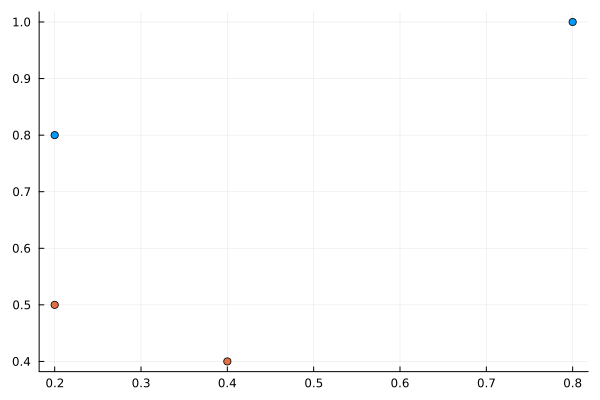

truetrue


In [9]:
# test your functions here on random segments

using Plots

# get 8 random numbers
data = [(rand(), rand()) for _ in 1:4]

# control the number of decimals
points = [(round(x[1], digits=1), round(x[2], digits=1)) for x in data]

# give them nice names
A = points[1]
B = points[2]
C = points[3]
D = points[4]

scatter([p[1] for p in points[1:2]], [p[2] for p in points[1:2]], label = "")
scatter!([p[1] for p in points[3:4]], [p[2] for p in points[3:4]], label = "")
plot!([A[1], B[1]], [A[2], B[2]], label="")
plot!([C[1], D[1]], [C[2], D[2]], label="")
display(plot!())

test1 = intersect_q(A[1], A[2], B[1], B[2], C[1], C[2], D[1], D[2])
test2 = orient_intersect_q(A[1], A[2], B[1], B[2], C[1], C[2], D[1], D[2])
println(test1, " ", test2)

<h2>Actual line-sweep function</h2>

We will use the function ${\tt do\_segments\_intersect}$ to test for vertices from $K$ which are visible from $T$ (a point which was just hit by the sweeping vertical line). Moreover, note that only boundary vertices of $|K|$ can be visible from $T$, so we will keep track of these boundary vertices at each step. (Note that the set of boundary vertices is, at least usually, much smaller than the set of all vertices.)

We do assume that the points in $P$ are in general position, so no two points share the same $x$-coordinate and no $3$ points lie on the same line.

Write a Julia function ${\tt line\_sweep}$ which returns the line sweep triangulation from a given set of points. Use the pseudocode below as an aid, but use some caution when following it. Additional checks are necessary to avoid unwanted intersections, e.g. the segment $TV$ will intersect the segment $VW$ (in the vertex $V$), but that does not yet mean that $V$ is not visible from $T$.

<img src="https://ucilnica.fri.uni-lj.si/pluginfile.php/227800/mod_resource/content/1/alg.png" alt="Algorithm" style="width:60%;">



[(0.281, 0.027), (0.539, 0.411), (0.625, 0.6), (0.665, 0.838), (0.687, 0.992), (0.718, 0.15)]


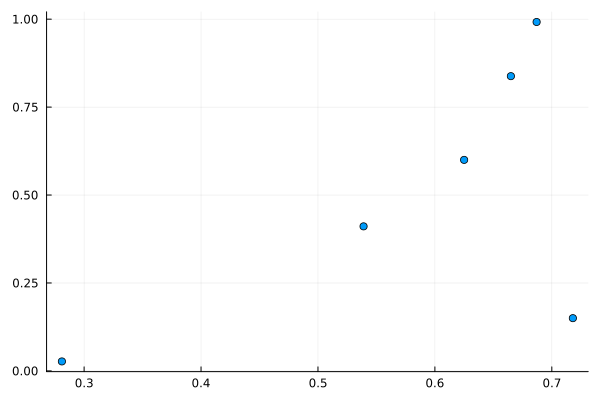

In [8]:
# Generate sample data
data = [(rand(), rand()) for _ in 1:6]
points = [(round(x[1], digits=3), round(x[2], digits=3)) for x in data]


# Function to perform line-sweep triangulation
function linesweeptriangulation(points)
    
    # Sort points by increasing x coordinates
    sort!(points, by = x -> x[1])

    println(points)
    
    # Initialize
    triangles = []
    edges = []
    bd_edges = []
    bd_vertices = []

    # ================ MAGIC HERE ================ 
    


    # ================ PLOT RESULTS ================ 

    # Plot points
    scatter([p[1] for p in points], [p[2] for p in points], label = "")
    
    # Plot triangles
    #for t in triangles
    #    x_coords = [t[1], t[3], t[5], t[1]]
    #    y_coords = [t[2], t[4], t[6], t[2]]
    #    plot!(x_coords, y_coords, seriestype = :shape, lw=2, label="")
    #end
    
    # Plot line segments (edges)
    # list of xcoords, then list of ycoords!
    for e in edges
        plot!([e[1], e[3]], [e[2], e[4]], label="")
    end
    
    # Display the plot
    display(plot!()) 
end

# Run the function with sample points
linesweeptriangulation(points)